In [4]:
#Importing Important Library

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import json

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

In [5]:
# pd.read_csv to read csv file from local Disk
df_nyc=pd.read_csv('AB_NYC_2019.csv')

print('To Read top 5 Elements of Dataframe')
df_nyc.head()

To Read top 5 Elements of Dataframe


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Cleaning Missing Data

In [6]:
#.isnull() returns boolean value for all the values  to true or false
missing_values = df_nyc.isnull()

In [7]:
missing_values.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#For finding the number of missing values in the dataframe
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print(" ")

id
False    48895
Name: id, dtype: int64
 
name
False    48879
True        16
Name: name, dtype: int64
 
host_id
False    48895
Name: host_id, dtype: int64
 
host_name
False    48874
True        21
Name: host_name, dtype: int64
 
neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64
 
neighbourhood
False    48895
Name: neighbourhood, dtype: int64
 
latitude
False    48895
Name: latitude, dtype: int64
 
longitude
False    48895
Name: longitude, dtype: int64
 
room_type
False    48895
Name: room_type, dtype: int64
 
price
False    48895
Name: price, dtype: int64
 
minimum_nights
False    48895
Name: minimum_nights, dtype: int64
 
number_of_reviews
False    48895
Name: number_of_reviews, dtype: int64
 
last_review
False    38843
True     10052
Name: last_review, dtype: int64
 
reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64
 
calculated_host_listings_count
False    48895
Name: calculated_host_listings_count, dtype: int64
 
availab

In [9]:
#Remove those Rows with no Host Name
df_nyc.dropna(subset=['host_name'],axis=0,inplace=True)

# Caluclating Avg Price of Rooms
price_avg = df_nyc['price'].mean(axis=0)
price_avg

#Repalcing 0 value with avg value
df_nyc['price'].replace(0,price_avg,inplace=True)

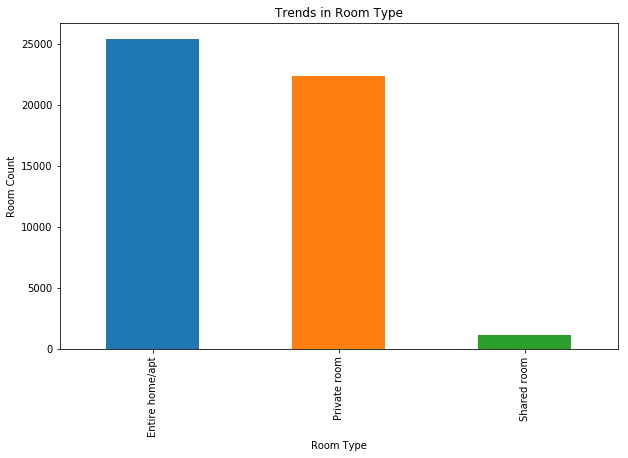

In [66]:
# Types of Room Available and there Count in New York

df_room_type =df_nyc['room_type'].value_counts()
# df_room = df_room_type.to_frame().transpose()
df_room_type.plot(kind='bar',figsize=(10,6))

plt.xlabel('Room Type')
plt.ylabel("Room Count")
plt.title("Trends in Room Type")

plt.show()

In [53]:
# Grouping the Hotels based on their NeighbourHood
df_grouped = df_nyc.groupby('neighbourhood_group')
df_grp_count = df_grouped.count()
df_grp_count = df_grp_count.iloc[:,0:1]

In [12]:
# df_grp_count = df_grp_count.transpose()

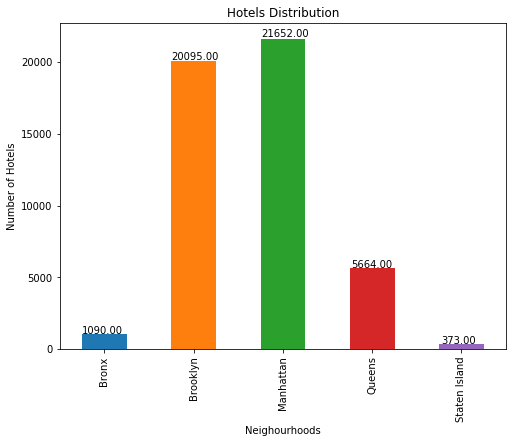

In [68]:
label = df_grp_count.index
#Representation for Distribution of Hotel using Bar Graph 
ax = df_grp_count['id'].plot(kind='bar',figsize=(8,6))
ax.set_title('Hotels Distribution')
ax.set_ylabel('Number of Hotels')
ax.set_xlabel('Neighourhoods')
for p in ax.patches:
    ax.annotate(str(format(p.get_height(),'.2f')), (p.get_x() * 1.005, p.get_height() * 1.005))



In [16]:
df_manhattan = df_grouped.get_group('Manhattan')
df_manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85.0,2,188,2019-06-23,1.50,1,39
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85.0,2,113,2019-07-05,0.91,1,333


In [17]:
len(df_manhattan['neighbourhood'].unique())

32

In [18]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

## Tranform the data into a pandas dataframe¶

In [19]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [21]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


## Segment and cluster only the neighborhoods in Manhattan

In [72]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [23]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude,longitude)

40.7896239 -73.9598939


In [24]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [77]:
CLIENT_ID = '1A2LAOB4VIR2ECLEPRSPWCKFRXXEA33S4VFZI11XF3MQR1UI' # your Foursquare ID
CLIENT_SECRET = 'JU1TMHRDGKNZLPCHQXOOXGUJHETYCU5FDNWG4QMD0ASRFBH1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150
radius =700

In [74]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [78]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [79]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,96,96,96,96,96,96
Carnegie Hill,100,100,100,100,100,100
Central Harlem,48,48,48,48,48,48
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


## How many unique categories can be curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 339 uniques categories.


In [81]:
manhattan_venues.shape

(3308, 7)

In [31]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

In [32]:
manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.0000,0.010417,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.010417,0.031250,0.000000,0.020833,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.0000,0.010000,0.00,0.00,0.000000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.010000,0.030000,0.000000,0.010000,0.030000
2,Central Harlem,0.000000,0.00,0.00,0.0625,0.041667,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.0000,0.030000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.0000,0.040000,0.00,0.00,0.000000,0.000000,...,0.040000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Civic Center,0.000000,0.00,0.00,0.0000,0.030000,0.01,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.0000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.0000,0.020000,0.01,0.00,0.010000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.0000,0.050000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000


## Printing each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
         venue  freq
0         Park  0.08
1        Hotel  0.05
2  Coffee Shop  0.05
3          Gym  0.04
4    Wine Shop  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.07
1     Pizza Place  0.06
2  Cosmetics Shop  0.04
3            Café  0.04
4     Yoga Studio  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.06
1   Seafood Restaurant  0.04
2  American Restaurant  0.04
3                  Bar  0.04
4   Chinese Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2              Bakery  0.05
3      Ice Cream Shop  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.10
1           Cocktail Bar  0.05
2  Vietnamese Restaurant  0.04
3    American Restaurant  0.04
4                    Spa  0.03


----Civic Center----
                  venue  freq
0  Gym / Fitness Center  0.05
1     

### A function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Wine Shop,Memorial Site,Plaza,Pizza Place,Clothing Store,Sandwich Place
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Cosmetics Shop,Grocery Store,Bar,Bakery,French Restaurant,Japanese Restaurant,Yoga Studio
2,Central Harlem,African Restaurant,Seafood Restaurant,Public Art,French Restaurant,Fried Chicken Joint,Bar,Cosmetics Shop,Chinese Restaurant,American Restaurant,Caribbean Restaurant
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Ice Cream Shop,Nightclub,Wine Shop,Hotel,American Restaurant,Seafood Restaurant,Theater
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Hotpot Restaurant,Spa,Asian Restaurant


## Cluster Neighborhoods 

In [37]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 0, 0, 0, 0, 0, 4, 1, 1])

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,American Restaurant,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Clothing Store,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Hotpot Restaurant,Spa,Asian Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Mobile Phone Shop,Grocery Store,Bakery,Chinese Restaurant,Latin American Restaurant,Coffee Shop,Spanish Restaurant,Supplement Shop,New American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Lounge,Pizza Place,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Chinese Restaurant,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,Bakery,Park,Cocktail Bar,Sandwich Place,School


## Merging Hotels and Venues Nearby 


In [39]:
# Both the Dataframe have some different name for Neighboour hood, 
# So have to replace Hell's Kitchen to Clinton and Harlem to central harlem
df_manhattan.replace(to_replace=["Hell's Kitchen","Harlem"],value=["Clinton","Central Harlem"],inplace=True)

C:\Users\TERMI\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [40]:
#merging both the dataframe on neighbourhood
df_manhattan_best = df_manhattan.merge(manhattan_merged,left_on='neighbourhood',right_on='Neighborhood')

In [41]:
# Sorting Datafram by id and Setting Index as 'id'
df_manhattan_best.sort_values(by='id',inplace=True)
df_manhattan_best.set_index('id',inplace=True)

In [42]:
df_manhattan_best.drop(['minimum_nights','last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365','Borough', 'Neighborhood', 'Latitude', 'Longitude',
       'Cluster Labels'],axis=1,inplace=True)

In [43]:
df_manhattan_best.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
id,,,,,,,,,,,,,,,,,,,,
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,45,Hotel,Theater,Sporting Goods Shop,Clothing Store,Coffee Shop,Spa,Food Truck,Bookstore,Steakhouse,Bakery
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Central Harlem,40.80902,-73.94190,Private room,150.0,0,African Restaurant,Seafood Restaurant,Public Art,French Restaurant,Fried Chicken Joint,Bar,Cosmetics Shop,Chinese Restaurant,American Restaurant,Caribbean Restaurant
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,9,Mexican Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Latin American Restaurant,Shoe Store,Breakfast Spot,Spanish Restaurant,Steakhouse,Spa
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,74,Coffee Shop,Sandwich Place,American Restaurant,Bar,Japanese Restaurant,Gym / Fitness Center,Gym,Italian Restaurant,Hotel,Jewish Restaurant
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Clinton,40.76489,-73.98493,Private room,79.0,430,Theater,Italian Restaurant,Gym / Fitness Center,Coffee Shop,American Restaurant,Spa,Wine Shop,Hotel,Gym,Cocktail Bar
